In [297]:
from Bio import Entrez, SeqIO
from Bio.Seq import Seq
import numpy as np
import matplotlib.pyplot as plt

In [298]:
def sequence_from_fasta_file(file_path, start_position, end_position):  
    with open(file_path, "r") as f:
        fasta_content = f.read().split('\n')
    sequence = ""
    for line in fasta_content:
        if line.startswith(">"):
            continue
        sequence += line.strip()

    sequence_range = sequence[start_position-1:end_position]
    return sequence_range

In [299]:
genes = ['ORF1ab','S','ORF3a','E','M','ORF6','ORF7a','ORF7b','ORF8','N','ORF10']

strains = ['CHN','IND','USA','GRB','ZAF','KOR']

accession_no_strain = {'CHN': 'NC_045512.2','IND':'OM915402.1','USA':'MT412243.1','GRB':'MT882022.1','ZAF':'PP522473.1','KOR':'OR432315.1'}

China = {}
India = {}
Usa = {}
Britain = {}
SAfrica = {}
Korea = {}

In [300]:
def create_dict_genes(country,genes,range_values,j):
        for i in range(len(genes)):
            start_position = range_values[i][0]
            end_position = range_values[i][1]

            country[genes[i]] = sequence_from_fasta_file(f"../fasta_files/{accession_no_strain[j]}.fasta",start_position,end_position) 
            # print(country[genes[i]])


In [301]:
China_range = [(266,13483),(21563,25384),(25393,26220),(26245,26472),(26523,27191),(27202,27387),(27394,27759),(27756,27887),(27894,28259),(28274,29533),(29558,29674)]
India_range = [(236,13453),(21533,25354),(25363,26190),(26215,26442),(26493,27161),(27172,27357),(27364,27729),(27726,27857),(27864,28229),(28244,29503),(29528,29644)]
Usa_range =  [(255,13472),(21552,25373),(25382,26209),(26234,26461),(26512,27180),(27191,27376), (27383, 27748), (27745,27876),(27883,28248),(28263,29522),(29547,29663)]
Britain_range =  [(264,13481),(21561,25382),(25391,26218),(26243,26470),(26521,27189),(27200,27385),(27392,27757),(27754,27885),(27892,28257),(28272,29531),(29556,29672)]
SAfrica_range =  [(216,13433),(21513,25334),(25343,26170),(26195,26422),(26473,27141),(27152,27337),(27344,27709),(27706,27837),(27844,28209),(28224,29483),(29508,29624)]
Korea_range =  [(266,13483),(21563,25384),(25393,26220),(26245,26472),(26523,27191),(27202,27387),(27394,27759),(27756,27887),(27894,28259),(28274,29533),(29558,29674)]

In [302]:
create_dict_genes(China,genes,China_range,'CHN')
create_dict_genes(India,genes,India_range,'IND')
create_dict_genes(Usa,genes,Usa_range,'USA')
create_dict_genes(Britain,genes,Britain_range,'GRB')
create_dict_genes(SAfrica,genes,SAfrica_range,'ZAF')
create_dict_genes(Korea,genes,Korea_range,'KOR')

In [303]:
numpy_image_dict = {'ORF1ab':[(115,115),7],
                    'S':[(62,62),22],
                    'ORF3a':[(28,30),12],
                    'E':[(15,16),12], 
                    'M':[(26,27),33],
                    'ORF6':[(14,14),10],    
                    'ORF7a':[(19,20),14],
                    'ORF7b':[(12,12),12],
                    'ORF8':[(19,20),14],
                    'N':[(36,36),36],
                    'ORF10':[(11,11),4]}

In [304]:
def complement_sequence(sequence):  # Gives the compliment of a sequence
    seq_obj = Seq(sequence)
    complement = seq_obj.complement()
    return str(complement)

def numpfy(dna_seq):
        # This method takes in a dna sequence and convert them into numpy array.
        # Each of the nucleotide sequence is converted into one of the below numbers 
        # which then can be used in for analysis and comparison.
        arr = ''
        comp_seq = complement_sequence(dna_seq)
        for i in comp_seq:
            if i == 'A':
                arr += '0 '
            if i == 'T':
                arr += '255 '
            if i == 'C':
                arr += '100 '
            if i == 'G':
                arr += '200 '
            if i == 'N':
                arr += '75 '   
        arr_np = np.fromstring(arr,dtype=np.uint8,sep=' ')        
        num_array = arr_np
        return num_array

In [305]:
def gene_mod(genome):
    # This method modifies each of the sequence with dummy nucleotide 'N' so that for the shape of the numpy array.
    genome_keys = list(genome.keys())
    for k in genome_keys:
        N = numpy_image_dict[k][1]
        seq = add_N(N,genome[k])
        genome[k] = seq

def add_N(n,seq):
    # This method is called from gene_mod() method, for creating dummy nucleotide 'N'.
    while n > 0:
        seq += 'N'
        n -= 1
    return seq

In [306]:
gene_mod(China)
gene_mod(India)
gene_mod(Usa)
gene_mod(Britain)
gene_mod(SAfrica)
gene_mod(Korea)

In [307]:
#This is the core module developed as part of the effort.
class dna:

    # Constructor method
    def __init__(self,dna_seq):
        # Remove all of the empty characters in the nucleotide sequence.
        self.dir_3_5=dna_seq
        self.dir_5_3=self.dir_5_3_strand()
        self.mRna = None
        self.num_array = None

    def transcription(self):
        # This is a method that imitates the transcription of a gene to mRNA for Protein transalation.
        # This is mostly of the future use.
        trans=''
        for nuc in self.dir_5_3:
            if nuc == 'A':
                trans += 'U'
            if nuc == 'T':
                trans += 'A'
            if nuc == 'C':
                trans += 'G'
            if nuc == 'G':
                trans += 'C'
            if nuc == 'N':
                trans += 'N'
        self.mRna = trans
        return self.mRna

    def dir_5_3_strand(self):
        dir_5_3 = ''
        # This is a method which reads the 3 - 5 prime sequence and creates the 5 - 3 prime sequence.
        for nuc in self.dir_3_5:
            if nuc == 'A':
                dir_5_3 += 'T'
            if nuc == 'T':
                dir_5_3 += 'A'
            if nuc == 'C':
                dir_5_3 += 'G'
            if nuc == 'G':
                dir_5_3 += 'C'
            if nuc == 'N':
                dir_5_3 += 'N'
        return dir_5_3

    def numpfy(self):
        # This method takes in a dna sequence and convert them into numpy array.
        # Each of the nucleotide sequence is converted into one of the below numbers 
        # which then can be used in for analysis and comparison.
        arr = ''
        for i in self.dir_3_5:
            if i == 'A':
                arr += '0 '
            if i == 'T':
                arr += '255 '
            if i == 'C':
                arr += '100 '
            if i == 'G':
                arr += '200 '
            if i == 'N':
                arr += '75 '   
        arr_np = np.fromstring(arr,dtype=np.uint8,sep=' ')        
        self.num_array = arr_np
        return self.num_array

In [308]:

def mutation_analysis(country):
    # Create matplotlib subplots for each gene. 
    f,ax = plt.subplots(nrows=11,ncols=3,figsize=(25,30))
    gene_name = list(numpy_image_dict.keys())
    row = 0
    col = 0
    mut_dict={}
    for G in gene_name:
        # Loop thru each gene in the Cornona Virus nucleotide sequence.
        gene_us = dna(country[G])
        # Invoke the transcription method of the class dna 
        gene_us.transcription()
        # Invoke the mothod that converts the gene sequence into a numpy array.
        numpfy_usa = gene_us.numpfy()
        # Reshape the numpy array with a predeifned shape from the numpy_image_dict dictionary.
        numpfy_usa = numpfy_usa.reshape(numpy_image_dict[G][0])
        # sub-plot the numpy array with matplotlib pcolor method.
        ax[row][col].pcolor(numpfy_usa)
        ax[row][col].set_title(G+' Gene - country1')
        col+=1
        gene_china = dna(China[G])
        # Invoke the transcription method of the class dna 
        gene_china.transcription()
        # Invoke the mothod that converts the gene sequence into a numpy array.
        numpfy_china = gene_china.numpfy()
        # Reshape the numpy array with a predeifned shape from the numpy_image_dict dictionary.
        numpfy_china = numpfy_china.reshape(numpy_image_dict[G][0])
        # sub-plot the numpy array with matplotlib pcolor method.
        ax[row][col].pcolor(numpfy_china)
        ax[row][col].set_title(G+' Gene - CHINA')
        col+=1

        # To find the gene mutation subtract the numpy array from base sequence with the newer sequence. Here the 
        # the Chinese sequence is the base sequence and the USA sequence is a newer sequence.
        mut = numpfy_china - numpfy_usa
        if mut.any():
            # Here we are looking for a non zero value in the mutated numpy array (result of the subtracting the 2 numpy arrays).
            # Presence of non-zero value means that there is difference between the 2 numpy arrays and the gene has 
            # mutataions. If there are mutations in the gene create a python dictionary "mut_dict" with details as below.
            # {'<Gene_Name-1>': [[<value_of_base_seq>, <value_of_newer_seq>, <value_in_mutated_numpy>, (x_value,y_value)]], '<Gene_Name-2>': [[<value_of_base_seq>, <value_of_newer_seq>, <value_in_mutated_numpy>, (x_value,y_value)]]}
            mut_nec = np.nonzero(mut)
            x=mut_nec[0]
            y=mut_nec[1]
            l=0
            mut_dict[G]=[]
            for i in x:
                us_base = numpfy_usa[i][y[l]]
                ch_base = numpfy_china[i][y[l]]
                mut_base = mut[i][y[l]]
                info_list = [ch_base,us_base,mut_base,(i,y[l])]
                mut_dict[G].append(info_list)
                # print("Mutated DNA Base {} in China and Base {} in {country} at position {} For the Gene {}".format(ch_base,us_base,(i,y[l]),G))
                l+= 1
        # Giving a title to the matplotlib subplot
        ax[row][col].pcolor(mut)
        ax[row][col].set_title(G+' Gene - Mutataion')
        row+= 1
        col=0

    f.tight_layout()


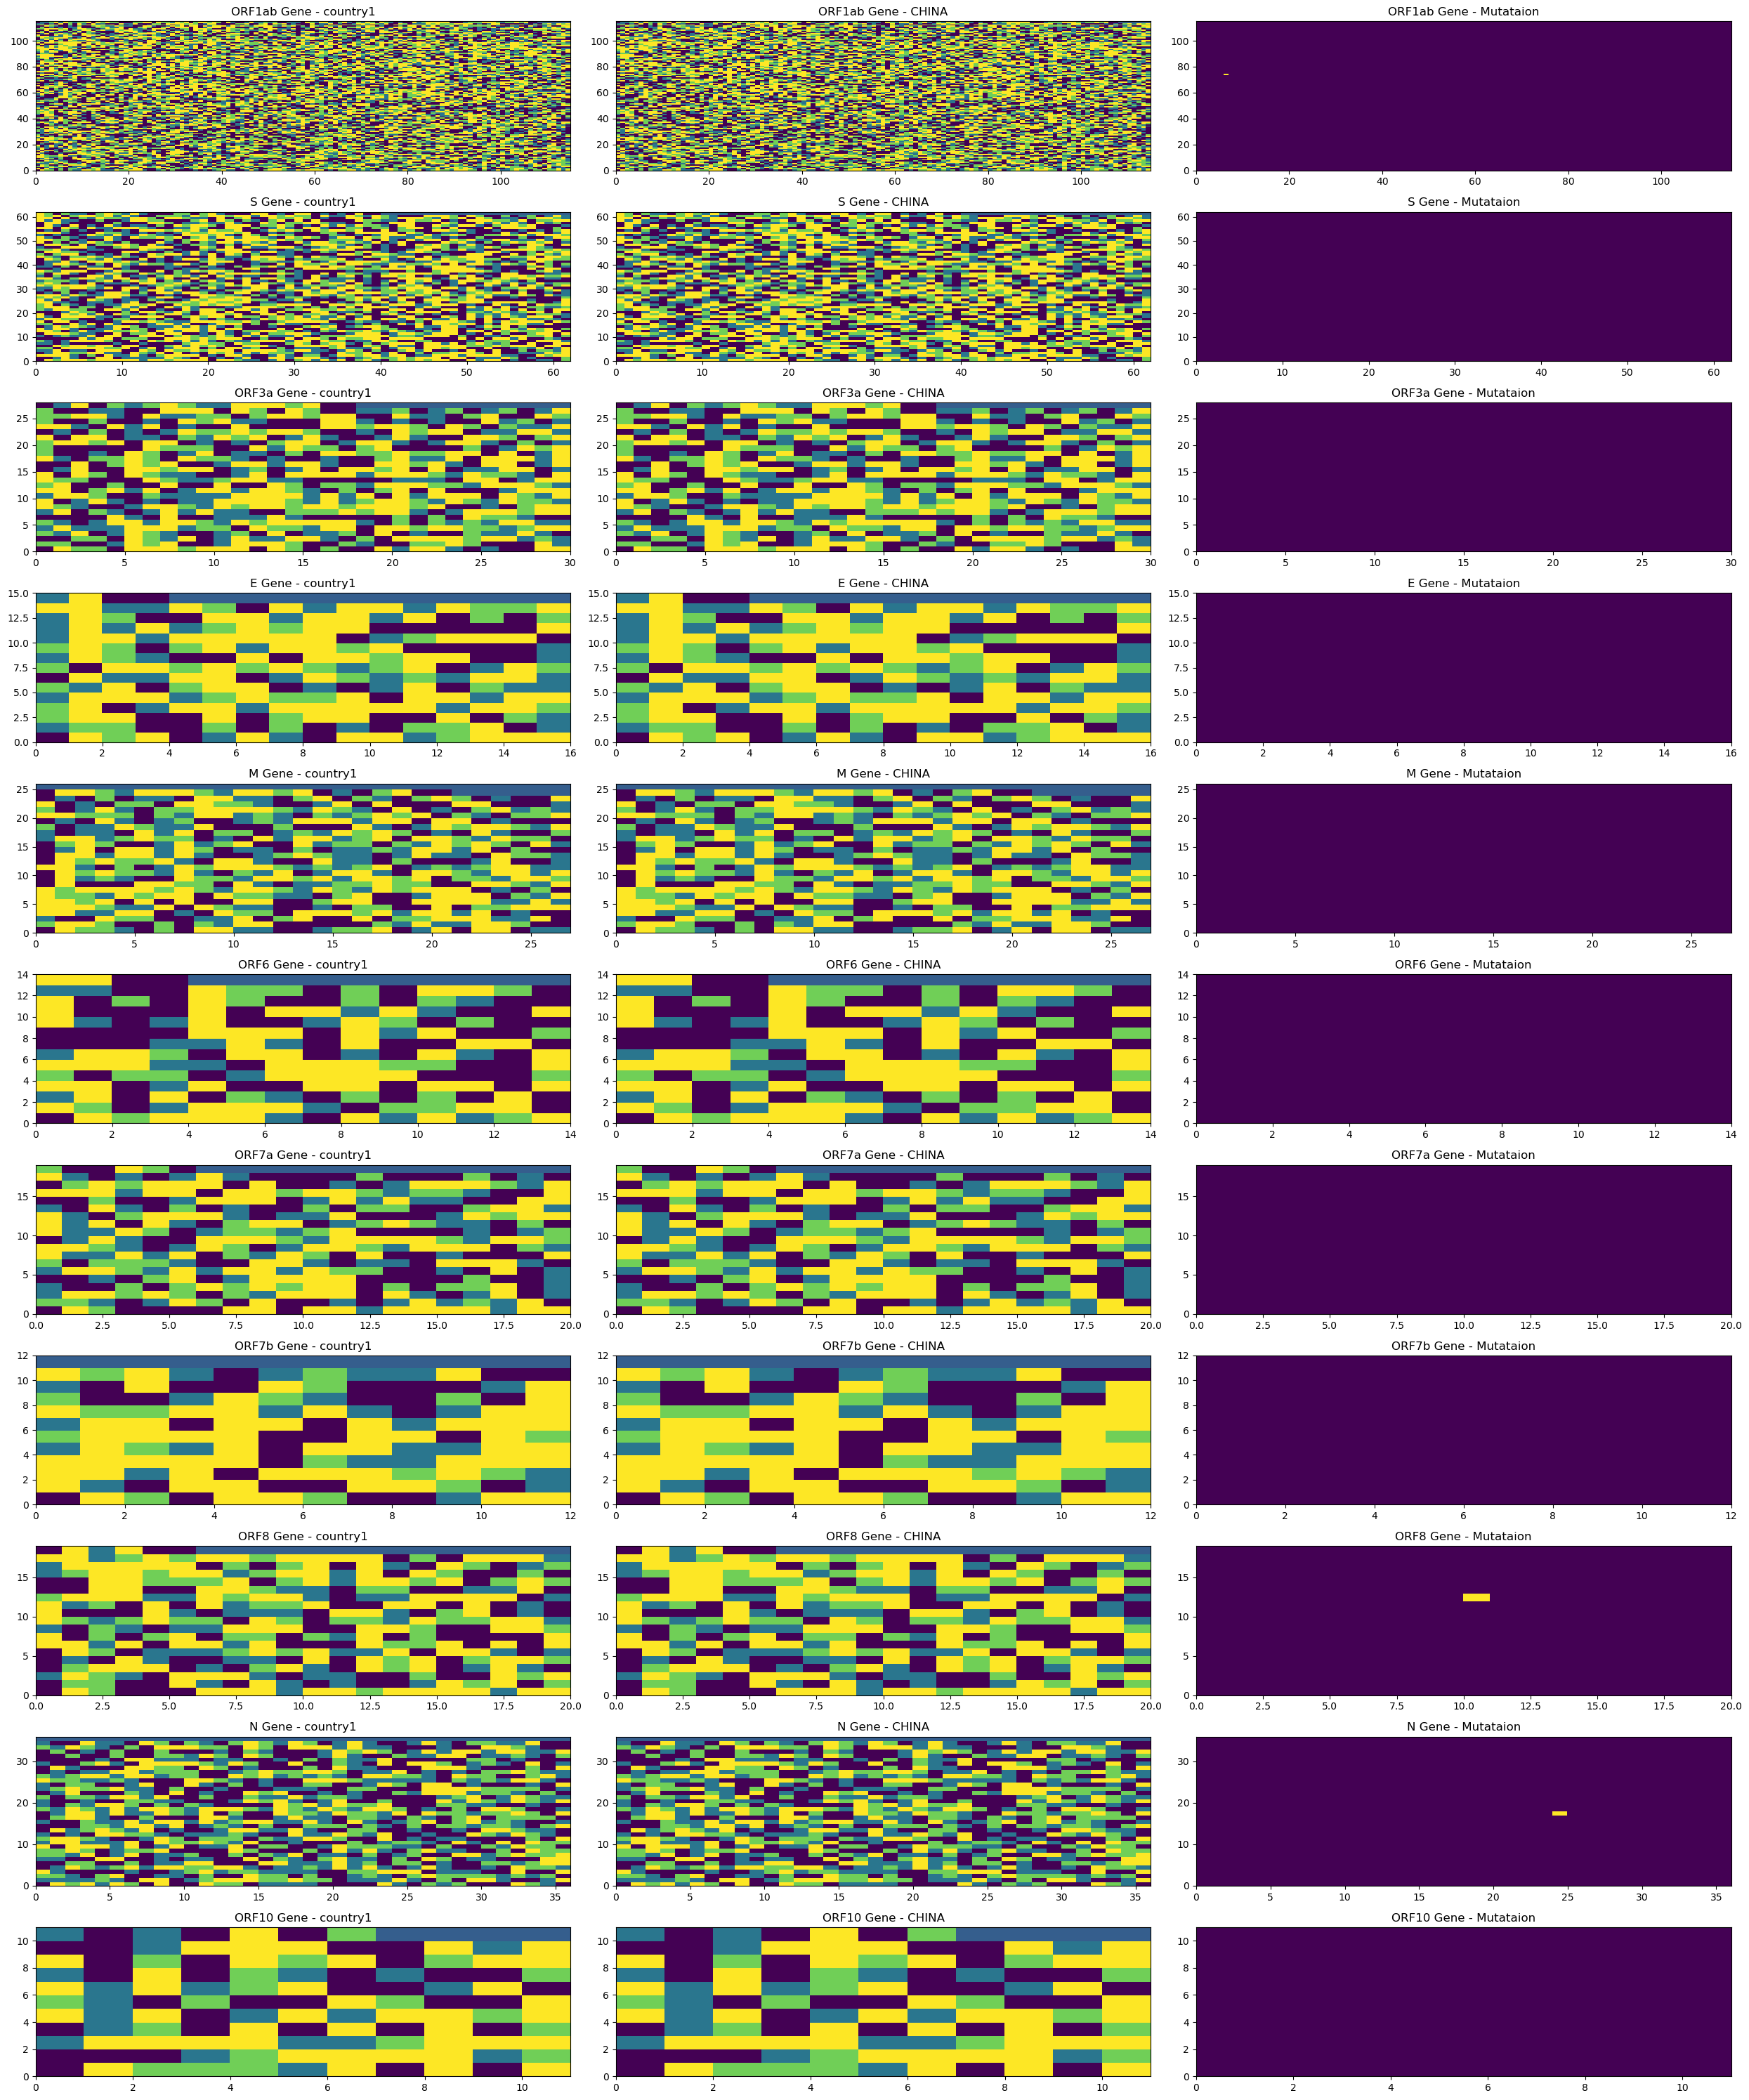

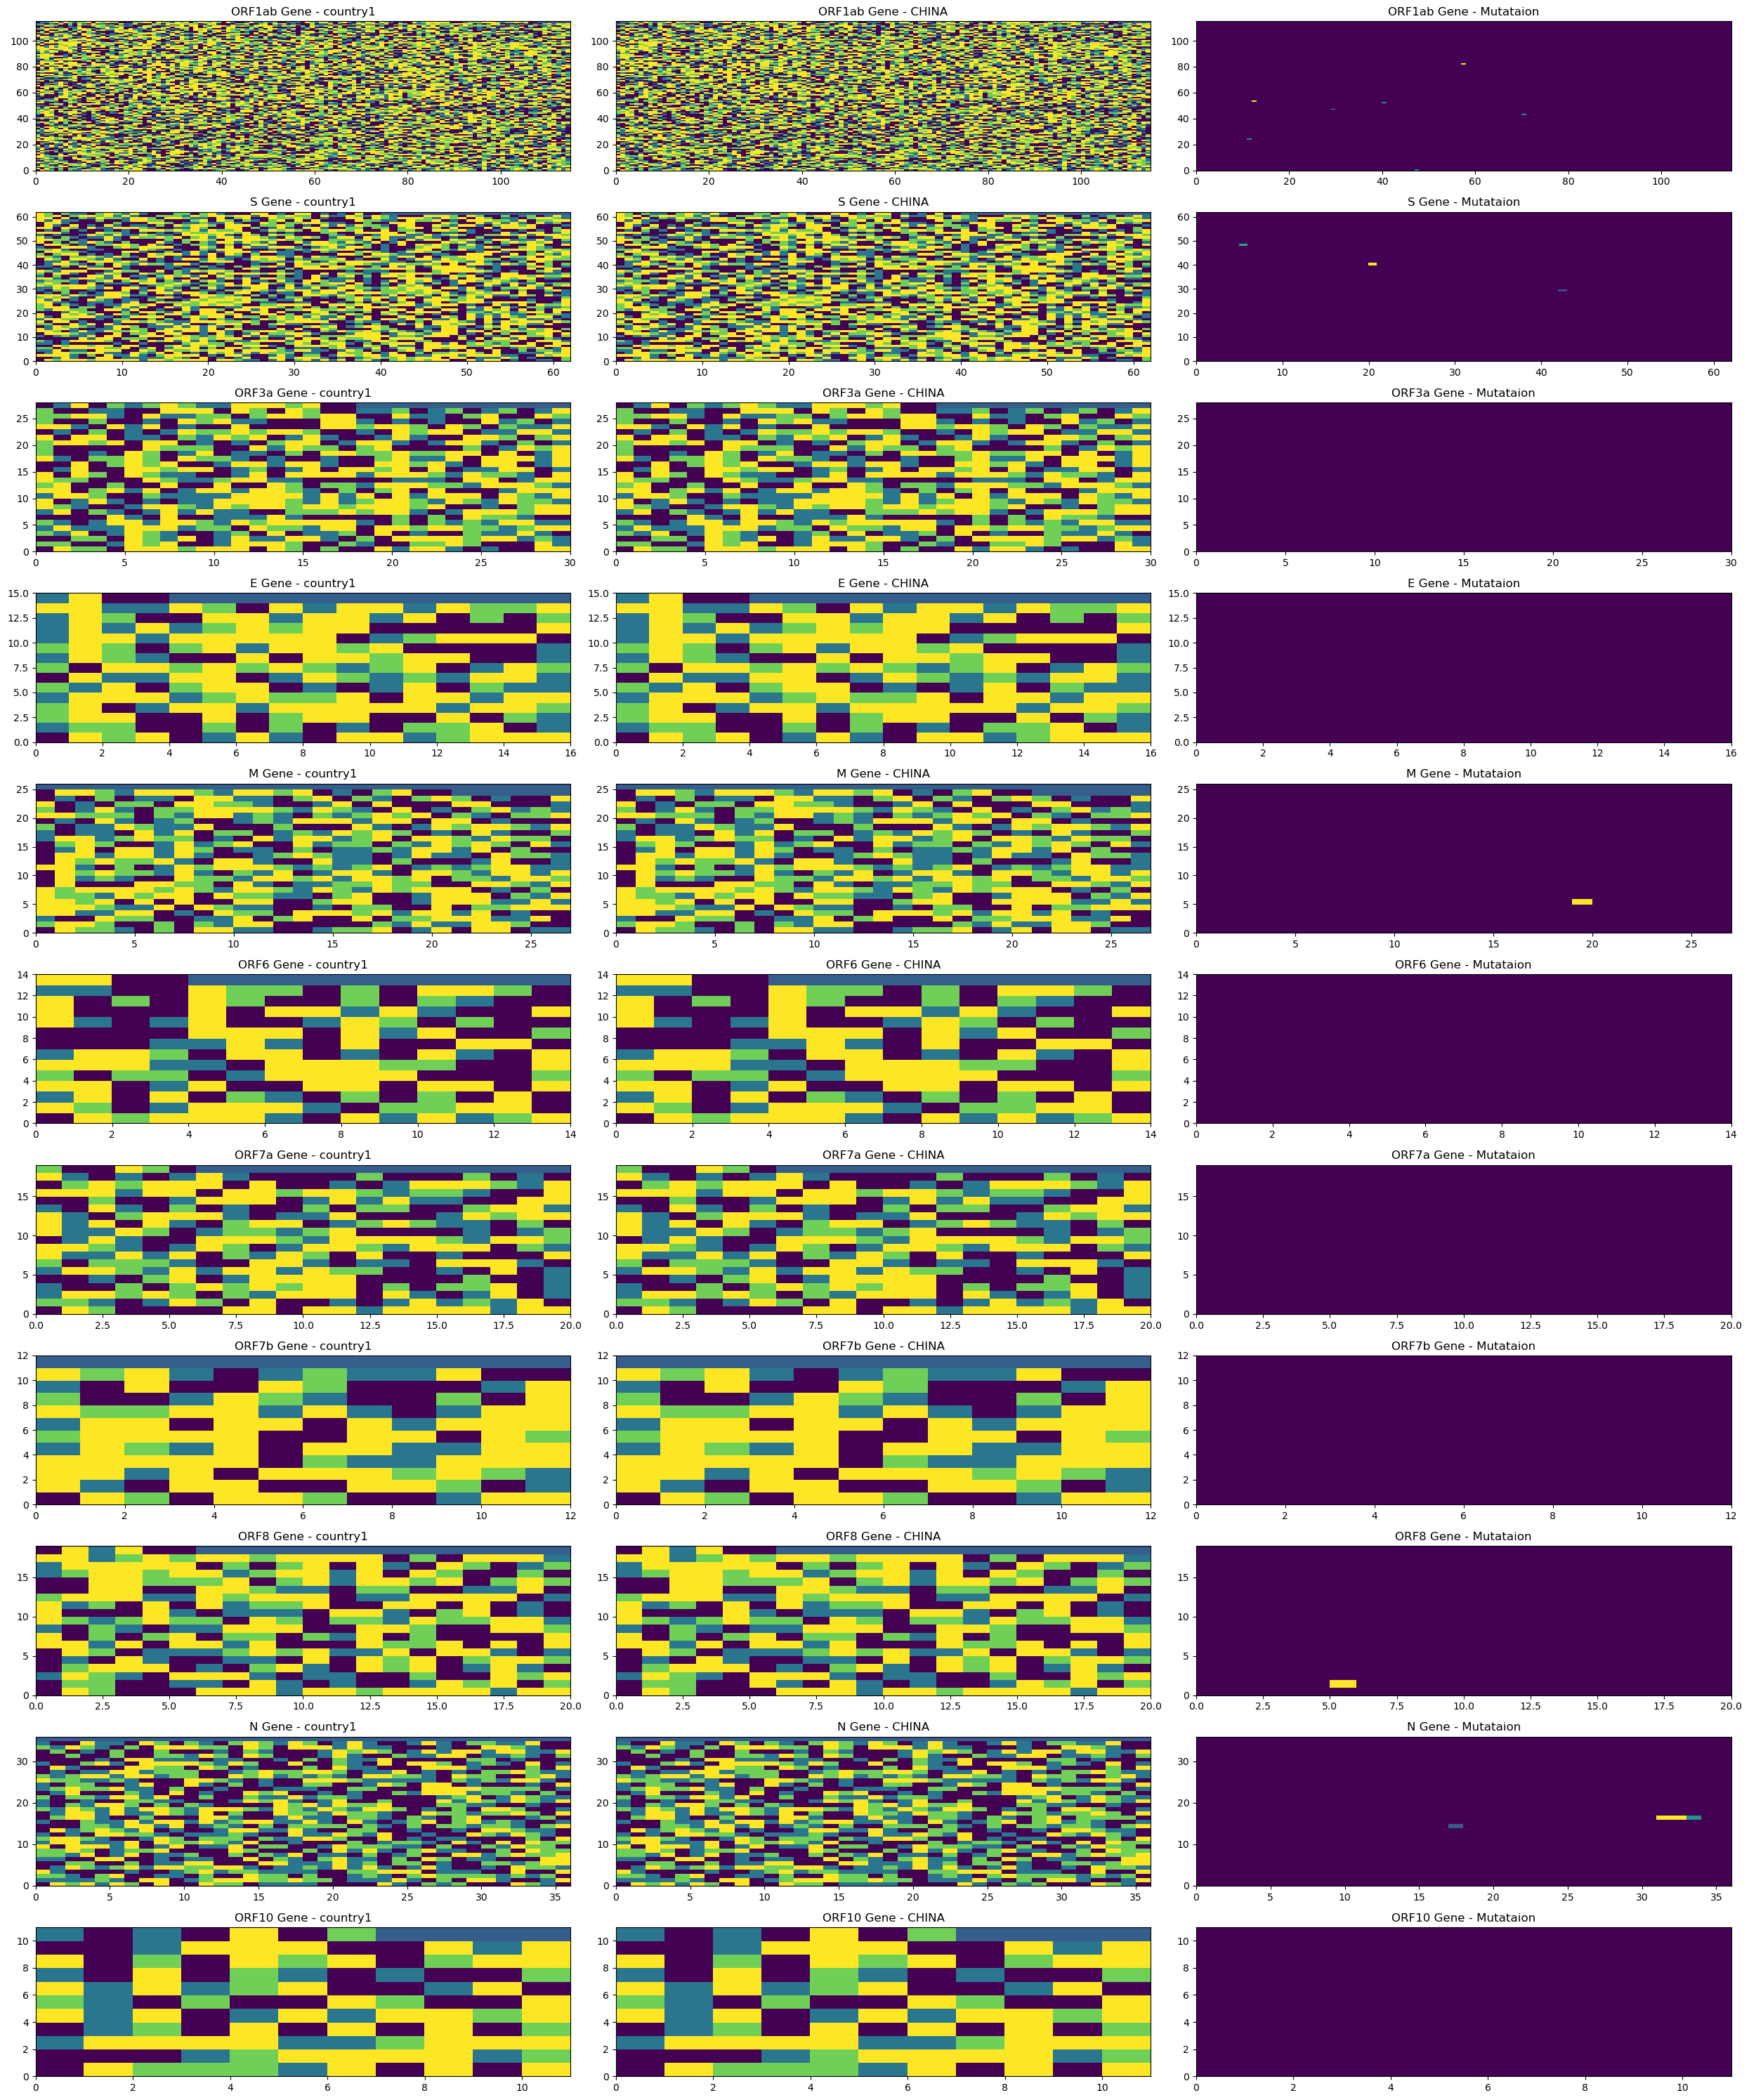

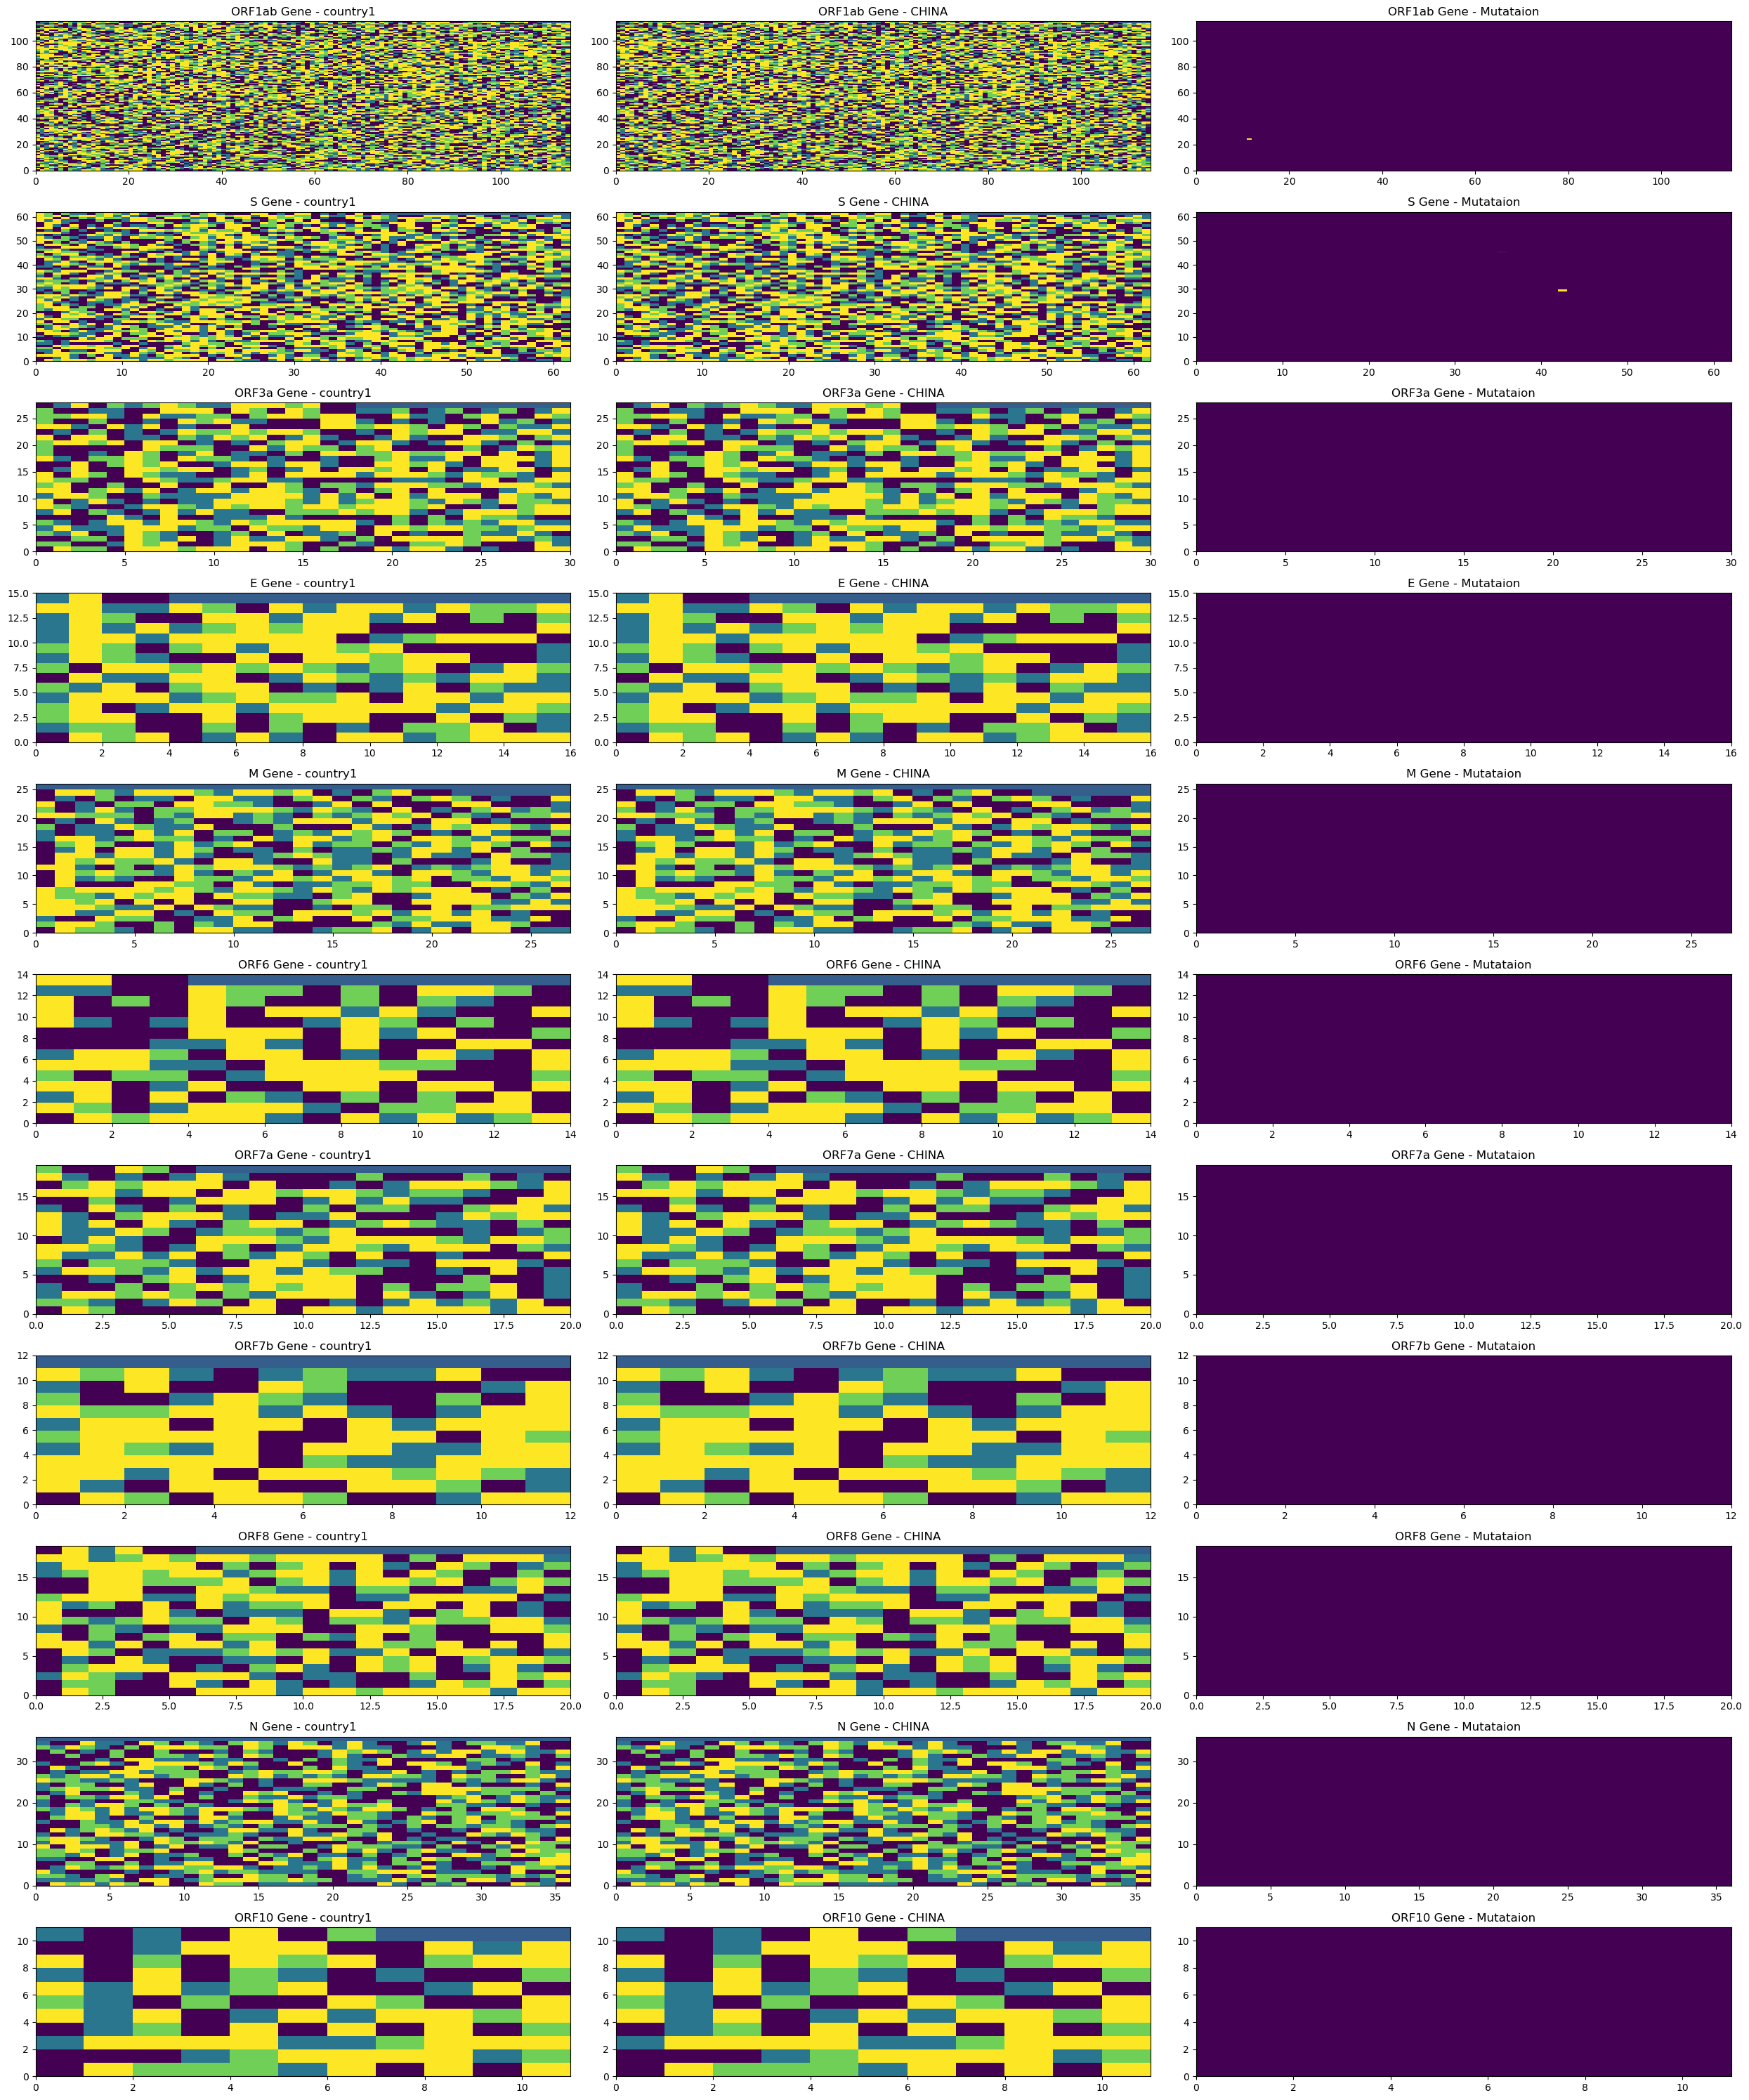

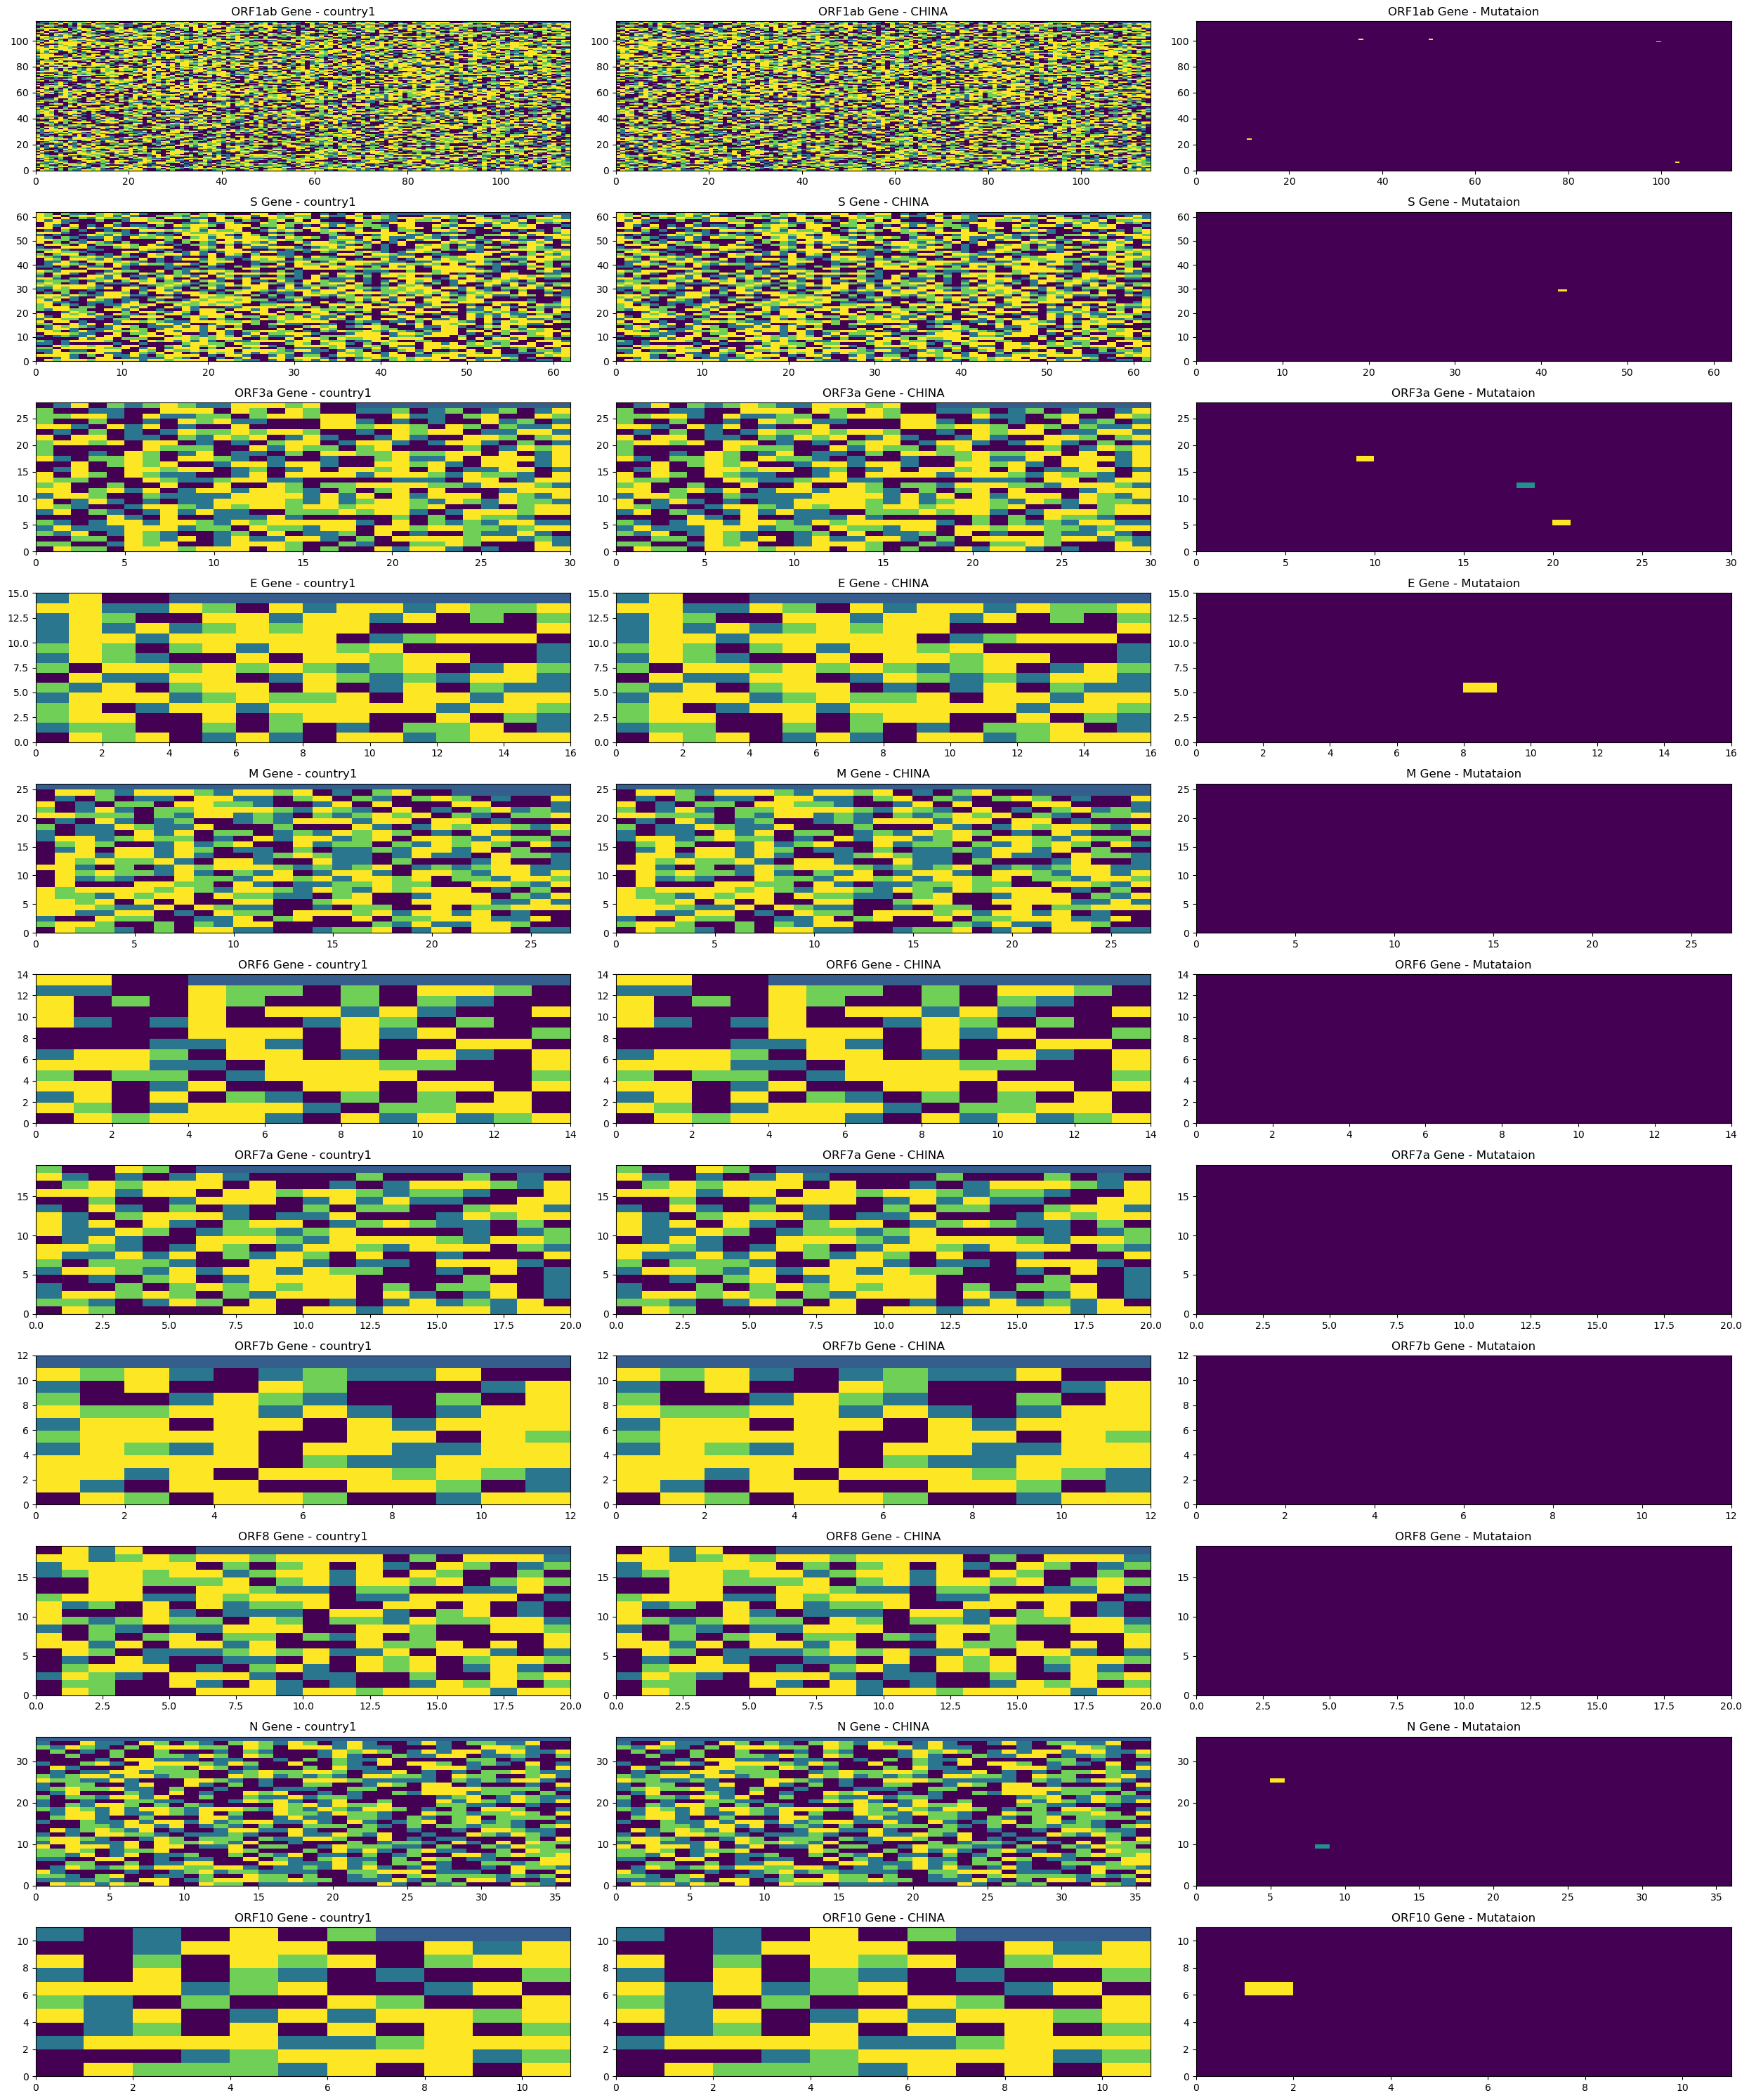

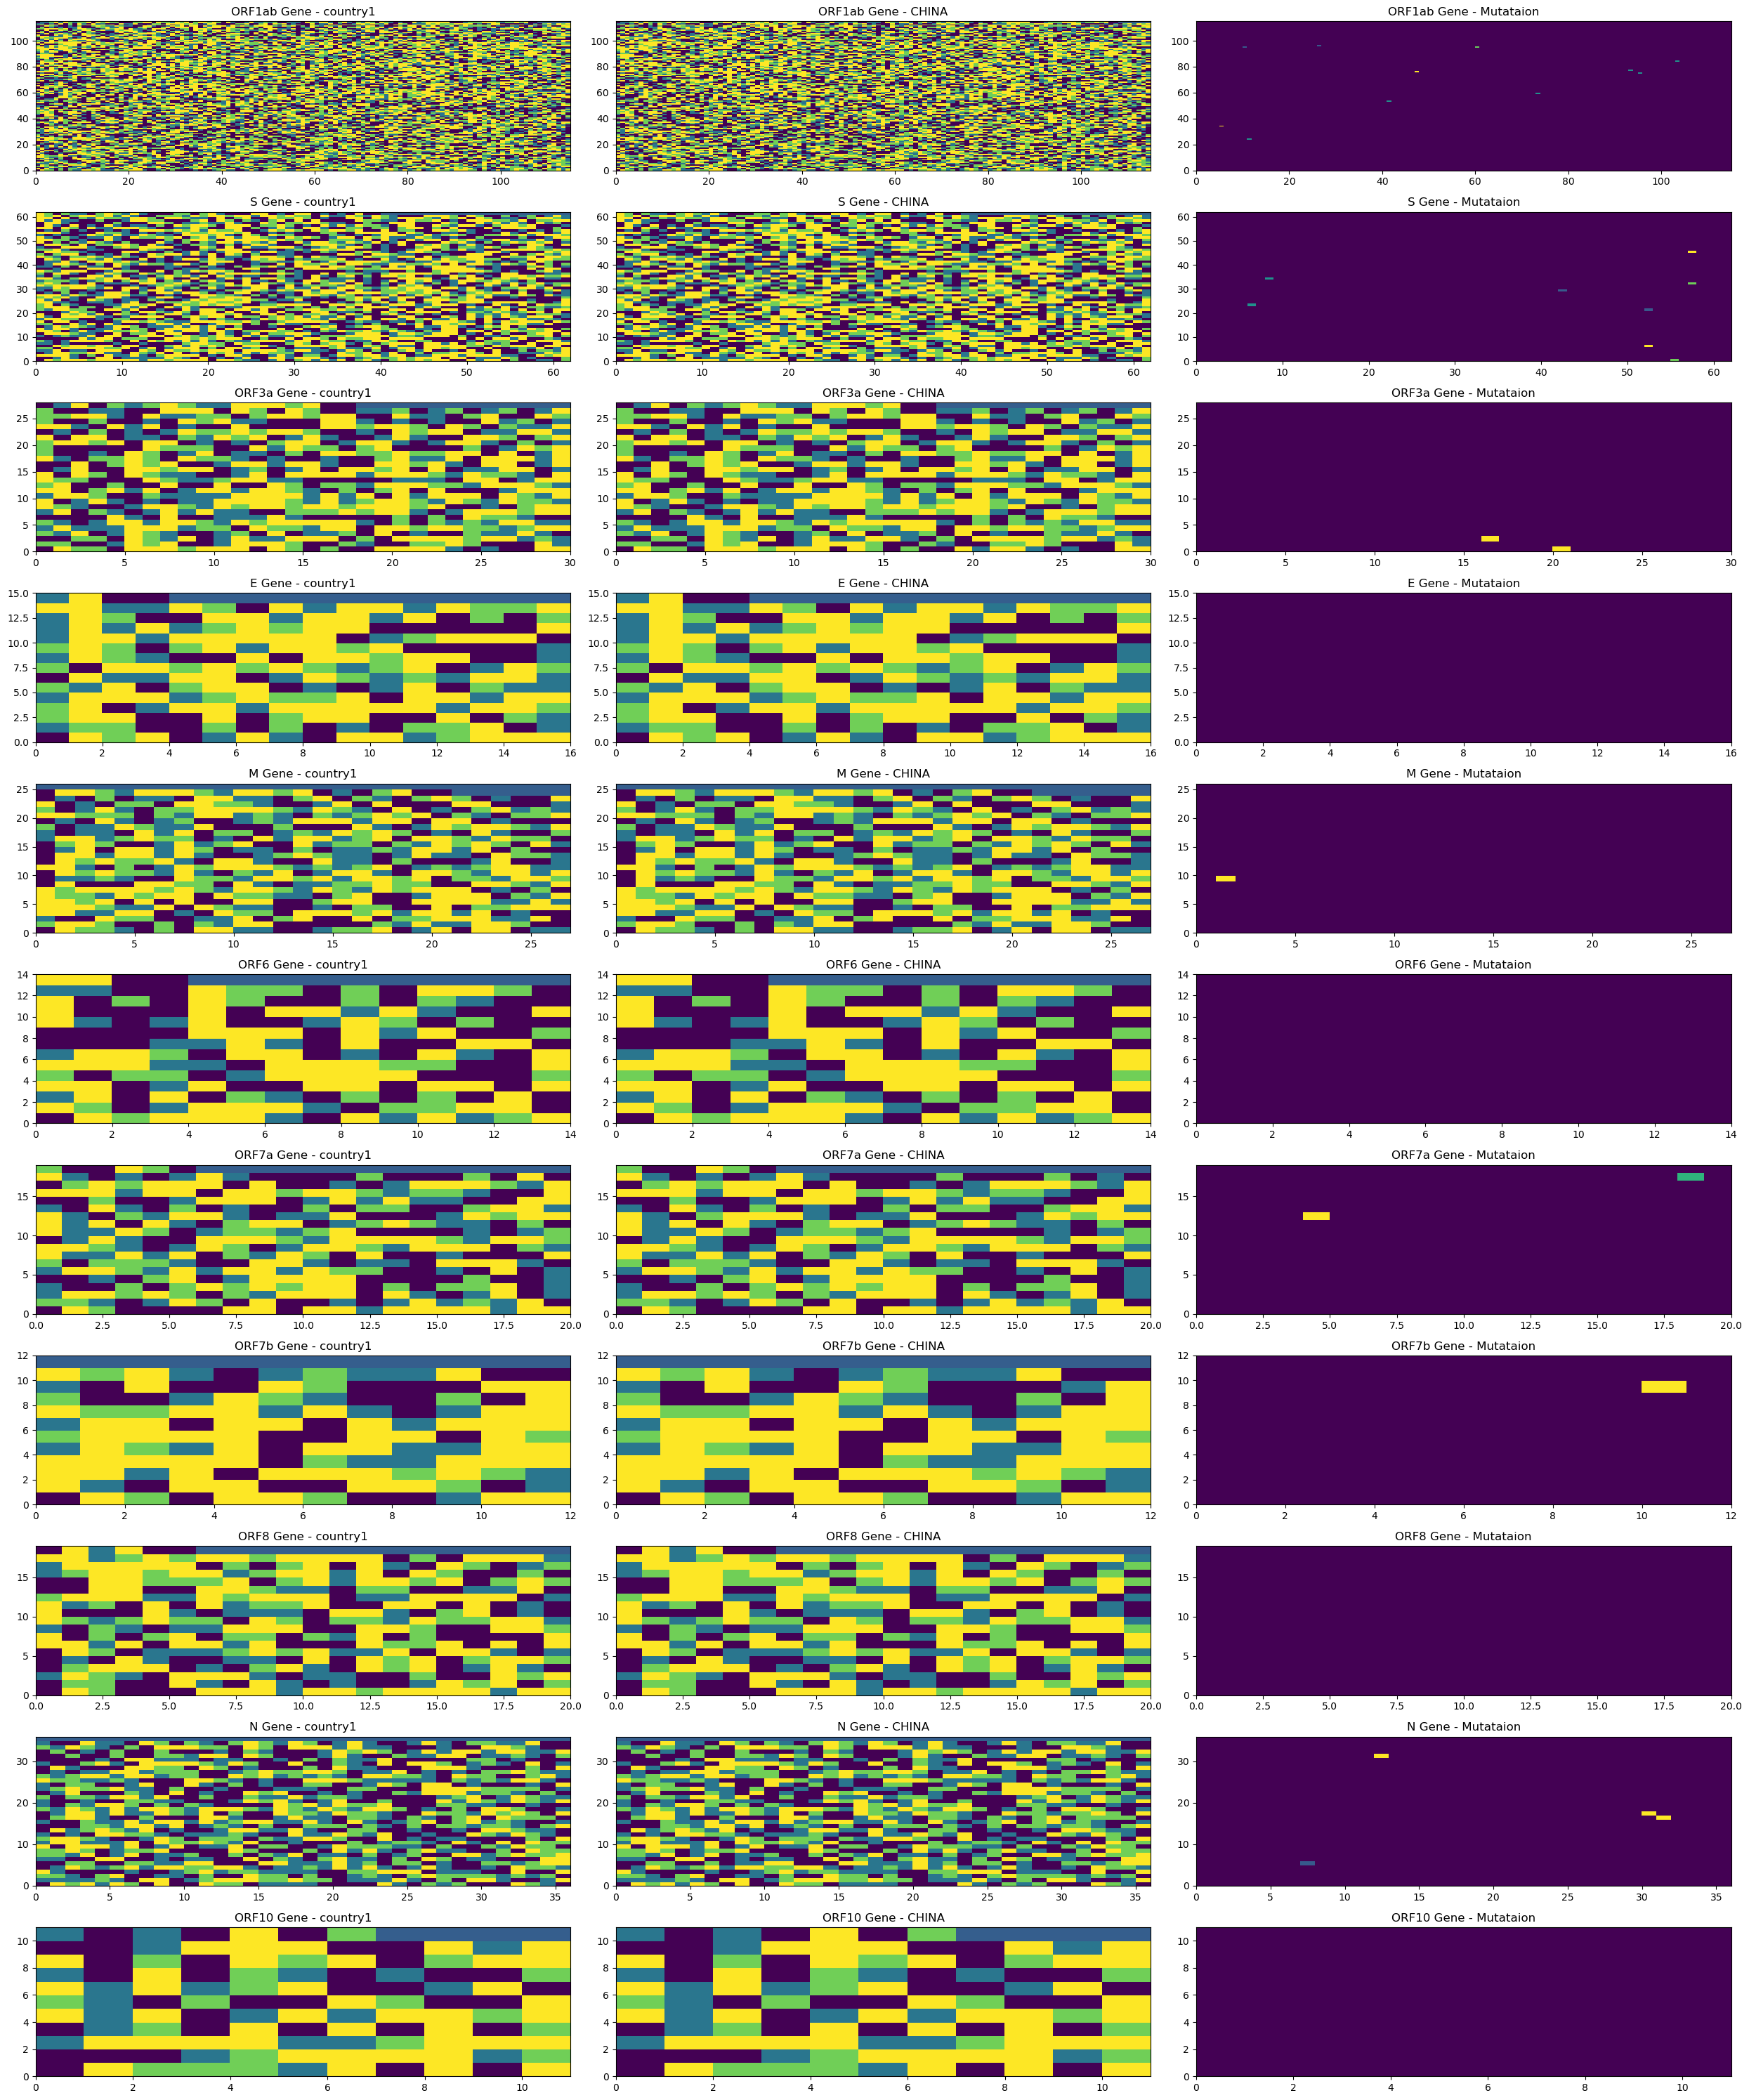

In [309]:
mutation_analysis(Usa)
mutation_analysis(India)
mutation_analysis(Britain)
mutation_analysis(Korea)
mutation_analysis(SAfrica)